In [1]:
# 1.从全连接层到卷积

In [3]:
# 2.图像卷积
# 互相关运算
import torch
from torch import nn
from d2l import torch as d2l

In [140]:
def corr2d(x, k):  #@save
    k_h, k_w = k.shape
    y = torch.zeros((x.shape[0] - k_h + 1, x.shape[1] - k_w + 1))
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            y[i, j] = (x[i:i + k_h, j:j + k_w] * k).sum()
    return y

In [16]:
x = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
k = torch.tensor([[0.0, 1.0], [2.0, 3.0]])

In [17]:
corr2d(x, k)

tensor([[19., 25.],
        [37., 43.]])

In [31]:
# 图像中目标的边缘检测
x = torch.ones((6, 8))
x[:, 2:6] = 0
x

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [32]:
k = torch.tensor([[1.0, -1.0]])
y = corr2d(x, k)
y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [33]:
x.t()

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

In [35]:
# 卷积层
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(toch.zeros(1))
    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

In [58]:
# 学习卷积核
# 构造一个二维卷积层，它具有 1 个输出通道和形状为 (1，2) 的卷积核
conv2d = nn.Conv2d(1, 1, kernel_size = (1, 2), bias = False)
# 四维输入和输出格式(批量大小，通道，高度，宽度)
x = x.reshape((1, 1, 6, 8))
y = y.reshape((1, 1, 6, 7))
for i in range(30):
    y_hat = conv2d(x)
    l = (y_hat - y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    # 迭代卷积核
    conv2d.weight.data[:] -= 3e-2 * conv2d.weight.grad
    if (i + 1) % 10 == 0:
        print(f"batch{i + 1}, loss: {l.sum():.3f}")

batch10, loss: 0.062
batch20, loss: 0.001
batch30, loss: 0.000


In [48]:
conv2d.weight.data.reshape((1, 2))

tensor([[ 0.9996, -1.0004]])

In [122]:
# 3.填充与步幅
# 填充
import torch
from torch import nn

In [127]:
x3 = torch.ones((6, 8))
x3

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [128]:
x3 = x3.reshape((1, 1) + x3.shape)
x3, x3.shape

(tensor([[[[1., 1., 1., 1., 1., 1., 1., 1.],
           [1., 1., 1., 1., 1., 1., 1., 1.],
           [1., 1., 1., 1., 1., 1., 1., 1.],
           [1., 1., 1., 1., 1., 1., 1., 1.],
           [1., 1., 1., 1., 1., 1., 1., 1.],
           [1., 1., 1., 1., 1., 1., 1., 1.]]]]),
 torch.Size([1, 1, 6, 8]))

In [129]:
def comp_conv2d(conv2d, x):
    x = x.reshape((1, 1) + x.shape)
    y = conv2d(x)
    return y.reshape(y.shape[2:])

In [131]:
conv2d = nn.Conv2d(1, 1, kernel_size = 3, padding = 1)

In [133]:
x = torch.rand(size = (8, 8))
comp_conv2d(conv2d, x).shape

torch.Size([8, 8])

In [134]:
conv2d1 = nn.Conv2d(1, 1, kernel_size = (5, 3), padding = (2, 1))
comp_conv2d(conv2d1, x).shape

torch.Size([8, 8])

In [136]:
# 步幅
conv2d = nn.Conv2d(1, 1, kernel_size = 3, padding = 1, stride = 2)

In [137]:
comp_conv2d(conv2d, x).shape

torch.Size([4, 4])

In [138]:
conv2d = nn.Conv2d(1, 1, kernel_size = (3, 5), 
                   padding = (2, 1), stride = (1, 2))

In [139]:
comp_conv2d(conv2d, x).shape

torch.Size([10, 3])

In [141]:
# 4.多输入通道
import torch
from d2l import torch as d2l

In [142]:
def corr2d_multi_in(X, K):
    return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

In [149]:
x = torch.tensor([[[0.0, 1.0, 2.0], 
                   [3.0, 4.0, 5.0], 
                   [6.0, 7.0, 8.0]], 
                  [[1.0, 2.0, 3.0], 
                   [4.0, 5.0, 6.0], 
                   [7.0, 8.0, 9.0]]])
k = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], 
                  [[1.0, 2.0], [3.0, 4.0]]])

In [150]:
corr2d_multi_in(x, k)

tensor([[ 56.,  72.],
        [104., 120.]])

In [151]:
# 多输出通道
k = torch.stack((k, k + 1, k + 2), 0)
k, k.shape

(tensor([[[[0., 1.],
           [2., 3.]],
 
          [[1., 2.],
           [3., 4.]]],
 
 
         [[[1., 2.],
           [3., 4.]],
 
          [[2., 3.],
           [4., 5.]]],
 
 
         [[[2., 3.],
           [4., 5.]],
 
          [[3., 4.],
           [5., 6.]]]]),
 torch.Size([3, 2, 2, 2]))

In [152]:
def corr2d_multi_in_out(X, K):
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [153]:
corr2d_multi_in_out(x, k)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

In [157]:
# 1 * 1 卷积
k = torch.tensor([[0.0, 1.0, 2.0], 
                  [3.0, 4.0, 5.0]])
a = k.reshape((2, 3, 1, 1))
a

tensor([[[[0.]],

         [[1.]],

         [[2.]]],


        [[[3.]],

         [[4.]],

         [[5.]]]])

In [158]:
a.shape

torch.Size([2, 3, 1, 1])

In [159]:
a.reshape(2, 3)

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [162]:
x = torch.tensor([[0.0, 1.0], 
                  [3.0, 4.0]])
y = torch.tensor([[0.0, 1.0], 
                  [3.0, 4.0]])
torch.matmul(x, y)

tensor([[ 3.,  4.],
        [12., 19.]])

In [163]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))

In [164]:
x = torch.normal(0, 1, (3, 3, 3))
k = torch.normal(0, 1, (2, 3, 1, 1))

In [166]:
y1 = corr2d_multi_in_out_1x1(x, k)
y1, y1.shape

(tensor([[[ 1.4387, -2.3395, -0.2631],
          [-0.4821,  0.2681, -0.8492],
          [-0.0456,  0.3173,  0.5502]],
 
         [[ 0.1854, -2.7801, -0.0738],
          [ 3.0828, -2.7175, -1.4528],
          [-1.1008,  1.7229, -0.8203]]]),
 torch.Size([2, 3, 3]))

In [168]:
y2 = corr2d_multi_in_out(x, k)
y2, y2.shape

(tensor([[[ 1.4387, -2.3395, -0.2631],
          [-0.4821,  0.2681, -0.8492],
          [-0.0456,  0.3173,  0.5502]],
 
         [[ 0.1854, -2.7801, -0.0738],
          [ 3.0828, -2.7175, -1.4528],
          [-1.1008,  1.7229, -0.8203]]]),
 torch.Size([2, 3, 3]))

In [171]:
assert float(torch.abs(y1 - y2).sum()) < 1e-6

In [172]:
# 5.池化层
# 最大池化层和平均池化层
import torch
from torch import nn
from d2l import torch as d2l

In [176]:
def pool2d(x, pool_size, mode = 'max'):
    p_h, p_w = pool_size
    y = torch.zeros((x.shape[0] - p_h + 1, x.shape[1] - p_w + 1))
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            if mode == 'max':
                y[i, j] = x[i:i + p_h, j:j + p_w].max()
            elif mode == 'avg':
                y[i, j] = x[i:i + p_h, j:j + p_w].mean()
    return y

In [177]:
x = torch.tensor([[0.0, 1.0, 2.0], 
                  [3.0, 4.0, 5.0], 
                  [6.0, 7.0, 8.0]])
pool2d(x, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [178]:
pool2d(x, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [190]:
# 填充与步幅
x = torch.arange(16, dtype = torch.float32).reshape((1, 1, 4, 4))
x

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [181]:
# 默认情况下，深度学习框架中的步幅与池化窗口的⼤小相同,若要调整，则需要手动
pool2d = nn.MaxPool2d(3)
pool2d(x)

tensor([[[[10.]]]])

In [182]:
pool2d = nn.MaxPool2d(3, padding = 1, stride = 2)
pool2d(x)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [183]:
pool2d = nn.AvgPool2d(3, padding = 1, stride = 2)
pool2d(x)

tensor([[[[ 1.1111,  2.6667],
          [ 5.6667, 10.0000]]]])

In [185]:
pool2d = nn.MaxPool2d((2, 3), padding = (1, 1), stride = (2, 3))
pool2d(x)

tensor([[[[ 1.,  3.],
          [ 9., 11.],
          [13., 15.]]]])

In [195]:
# 多个通道
x1 = torch.cat((x, x + 1), 0)
x1

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]],


        [[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [196]:
x2 = torch.stack((x, x + 1), 0)
x2

tensor([[[[[ 0.,  1.,  2.,  3.],
           [ 4.,  5.,  6.,  7.],
           [ 8.,  9., 10., 11.],
           [12., 13., 14., 15.]]]],



        [[[[ 1.,  2.,  3.,  4.],
           [ 5.,  6.,  7.,  8.],
           [ 9., 10., 11., 12.],
           [13., 14., 15., 16.]]]]])

In [197]:
pool2d = nn.MaxPool2d(3, padding = 1, stride = 2)
pool2d(x1)

tensor([[[[ 5.,  7.],
          [13., 15.]]],


        [[[ 6.,  8.],
          [14., 16.]]]])

## 6.卷积神经网络（LeNet）

In [219]:
from torch.utils import data
import torchvision
from torchvision import transforms
def get_dataloader_workers():  #@save
    """使用2个进程来读取数据"""
    return 2
def load_data_fashion_mnist(batch_size, resize = None):  #@save
    """下载 Fashion-mnist 数据集，然后加载到数据内存中"""
    """
    transforms.ToTensor:
    Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor
    """
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root = 'C:/Users/jiangyu/Desktop/cvtf', 
                                                    train = True, transform = trans, download = True)
    mnist_test = torchvision.datasets.FashionMNIST(root = 'C:/Users/jiangyu/Desktop/cvtf', 
                                                    train = False, transform = trans, download = True)
    return (data.DataLoader(mnist_train, batch_size, shuffle = True, num_workers = get_dataloader_workers()), 
            data.DataLoader(mnist_test, batch_size, shuffle = False, num_workers = get_dataloader_workers()))

In [215]:
class Accumulator:  #@save
    """在 n 个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

In [211]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的总数"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis = 1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [222]:
from IPython import display
import matplotlib.pyplot as plt
def use_svg_display():
    # 使用 svg 格式在 jupyter 中绘图
    display.set_matplotlib_formats('svg')
def set_figsize(figsize = (3.5, 2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴。"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, 
         xlim=None, ylim=None, xscale='linear', yscale='linear', 
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点。"""
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    # 如果 `X` 有⼀个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or 
                isinstance(X, list) and not hasattr(X[0], "__len__"))
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [223]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel = None, ylabel = None, 
                 legend = None, xlim = None, ylim = None, 
                 xscale = 'linear', yscale = 'linear', 
                 fmts = ('-', 'm--', 'g-.', 'r:'), 
                 nrows = 1, ncols = 1,  figsize = (3.5, 2.5)):
        """增量的绘制多条线"""
        if legend is None:
            legend = []
        use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize = figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        self.config_axes = lambda: set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, 
                                                xscale, yscale, legend)
        self.x, self.y, self.fmts = None, None, fmts
    def add(self, x, y):
        """向表中添加多个数据点"""
        if not hasattr(y, '__len__'):
            y = [y]
        n = len(y)
        if not hasattr(x, '__len__'):
            x = [x] * n
        if not self.x:
            self.x = [[] for _ in range(n)]
        if not self.y:
            self.y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.x[i].append(a)
                self.y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.x, self.y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait = True)

In [231]:
import numpy as np
import time
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()
    def start(self):
        """启动计时器"""
        self.tik = time.time()
    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)
    def sum(self):
        """返回时间总和"""
        return sum(self.times)
    def cumsum(self):
        """返回累积时间"""
        return np.array(self.times).cumsum().tolist()

In [212]:
# --------------------------------------------------
import torch
from torch import nn
from d2l import torch as d2l

In [199]:
class Reshape(torch.nn.Module):
    def forward(slef, x):
        return x.view(-1, 1, 28, 28)

In [201]:
net = nn.Sequential(Reshape(), 
                       nn.Conv2d(1, 6, kernel_size = 5, padding = 2),
                       nn.Sigmoid(), 
                       nn.AvgPool2d(kernel_size = 2, stride = 2), 
                       nn.Conv2d(6, 16, kernel_size = 5), 
                       nn.Sigmoid(), 
                       nn.AvgPool2d(kernel_size = 2, stride = 2), 
                       nn.Flatten(), 
                       nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(), 
                       nn.Linear(120, 84), nn.Sigmoid(), 
                       nn.Linear(84, 10))

In [206]:
x = torch.rand(size = (1, 1, 28, 28), dtype = torch.float32)
for layer in net:
    x = layer(x)
    print(layer.__class__.__name__, '---output shape: \t', x.shape)

Reshape ---output shape: 	 torch.Size([1, 1, 28, 28])
Conv2d ---output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid ---output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d ---output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d ---output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid ---output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d ---output shape: 	 torch.Size([1, 16, 5, 5])
Flatten ---output shape: 	 torch.Size([1, 400])
Linear ---output shape: 	 torch.Size([1, 120])
Sigmoid ---output shape: 	 torch.Size([1, 120])
Linear ---output shape: 	 torch.Size([1, 84])
Sigmoid ---output shape: 	 torch.Size([1, 84])
Linear ---output shape: 	 torch.Size([1, 10])


In [220]:
# 模型训练
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [233]:
def evaluate_accuracy_gpu(net, data_iter, device = None): #@save
    """使用 GPU 计算模型在数据集上的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = Accumulator(2)
    for x, y in data_iter:
        if isinstance(x, list):
            # BERT 微调所需的
            x = [X.to(device) for X in x]
        else:
            x = x.to(device)
        y = y.to(device)
        metric.add(accuracy(net(x), y), y.numel())
    return metric[0] / metric[1]

In [226]:
def train_ch6(net, train_iter, test_iter, 
              num_epochs, lr, device):  #@save
    """使用 GPU 训练模型"""
    def init_weight(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weight)
    print('training on:', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr = lr)
    loss = nn.CrossEntropyLoss()
    animator = Animator(xlabel = 'epoch', xlim = [1, num_epochs], 
                        legend = ['train loss', 'train acc', 'test acc'])
    timer, num_batches = Timer(), len(train_iter)
    for epoch in range(num_epochs):
        metric = Accumulator(3)
        net.train()
        for i, (x, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            x, y = x.to(device), y.to(device)
            y_hat = net(x)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * x.shape[0], 
                           accuracy(y_hat, y), x.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches, 
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f"loss: {train_l:.3f}, train acc: {train_acc:.3f}, \
          test_acc: {test_acc:.3f}")
    print(f"{metric[2] * num_epochs / timer.sum():.1f} example/sec, on {str(device)}")

In [227]:
lr, num_epochs = 0.9, 10

In [229]:
def try_gpu(i = 0):  #@save
    """如果存在，则返回 gpu(i)，否则返回 cpu()"""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f"cuda:{i}")
    return torch.device('cpu')

loss: 0.474, train acc: 0.822,           test_acc: 0.809
2401.7 example/sec, on cpu


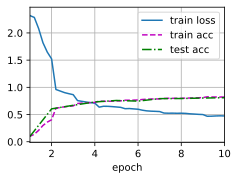

In [234]:
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [235]:
net = nn.Sequential(Reshape(), 
                       nn.Conv2d(1, 6, kernel_size = 5, padding = 2),
                       nn.ReLU(), 
                       nn.MaxPool2d(kernel_size = 2, stride = 2), 
                       nn.Conv2d(6, 16, kernel_size = 5), 
                       nn.ReLU(), 
                       nn.MaxPool2d(kernel_size = 2, stride = 2), 
                       nn.Flatten(), 
                       nn.Linear(16 * 5 * 5, 120), nn.ReLU(), 
                       nn.Linear(120, 84), nn.ReLU(), 
                       nn.Linear(84, 10))

loss: 0.315, train acc: 0.884,           test_acc: 0.856
2638.5 example/sec, on cpu


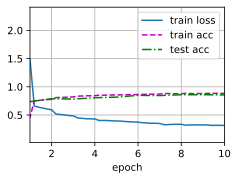

In [238]:
# 改成 ReLU()，和 MaxPool2d() 之后梯度变大了，要将学习率调小一点才可以收敛
lr, num_epochs = 0.1, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())